In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from collections import OrderedDict

In [2]:
df = pd.read_csv('data/Weather.csv', index_col=0)
years = df.index
miles_df = OrderedDict()

for yr in years:
    miles_df[yr] = pd.read_csv(f'data/3mile{yr}.csv', index_col=0)

def to_sec(time):
    '''
    convert time to seconds
    mm:ss -> sec = mm*60+ss
    '''
    mm, ss = time[:2], time[-2:]
    return int(mm)*60 + int(ss)

def to_time(sec):
    '''
    from sec to mm:ss
    '''
    m = int(sec // 60)
    s = int(sec % 60)
    return '{}:{}'.format(m, s)

df['T, Celsius'] = df['Temperature'].apply(lambda x: np.round((x - 32) * 5/9))

for yr in years:
    miles = miles_df[yr]
    miles['to_sec'] = miles['Final'].map(to_sec) # convert times to seconds
    df.loc[yr, 'Number of finishers'] = miles.shape[0]
    df.loc[yr, 'Best time in sec'] = miles.loc[1, 'to_sec']
    df.loc[yr, 'Best time'] = miles.loc[1, 'Final']
    df.loc[yr, 'Median time in sec'] = miles['to_sec'].median()
#     df.loc[yr, 'Std in sec'] = miles['to_sec'].std()
#     df.loc[yr, 'Avr in sec'] = miles['to_sec'].mean()
    df.loc[yr, 'Top 75'] = np.percentile(miles['to_sec'], 75)
    df.loc[yr, 'Top 25'] = np.percentile(miles['to_sec'], 25)
    
df['Median time'] = df['Median time in sec'].map(to_time)


df

,Date,Course,Temperature,Weather,"T, Celsius",Number of finishers,Best time in sec,Best time,Median time in sec,Top 75,Top 25,Median time
1998,8/21/98,Industrial Park,85.0,"humid, partly-sunny",29.0,39.0,1039.0,17:19,1252.0,1327.00,1107.50,20:52
1999,8/20/99,Industrial Loop,65.0,"clear, slight breeze",18.0,44.0,964.0,16:04,1158.0,1280.00,1086.50,19:18
2000,8/18/00,Industrial Loop,60.0,overcast and misty,16.0,44.0,935.0,15:35,1194.5,1282.00,1063.75,19:54
2001,8/17/01,Industrial Loop,60.0,overcast and windy,16.0,35.0,979.0,16:19,1152.0,1223.50,1086.50,19:12
2002,8/16/02,Industrial Loop,75.0,"overcast, humid",24.0,43.0,983.0,16:23,1174.0,1354.50,1099.00,19:34
2003,8/15/03,Industrial Loop,80.0,"partly sunny, humid",27.0,50.0,974.0,16:14,1281.0,1480.50,1168.75,21:21
2004,8/20/04,Industrial Loop,65.0,overcast,18.0,59.0,964.0,16:04,1245.0,1392.00,1155.00,20:45
2005,8/26/05,Campus Loop,85.0,overcast,29.0,57.0,1028.0,17:08,1252.0,1395.00,1127.00,20:52
2006,8/25/06,Campus Loop,80.0,sunny,27.0,69.0,1001.0,16:41,1210.0,1380.00,1120.00,20:10
2007,8/27/07,Olde High School Campus,75.0,"sunny, nice",24.0,48.0,945.0,15:45,1195.0,1278.00,1114.00,19:55


<IPython.core.display.Javascript object>


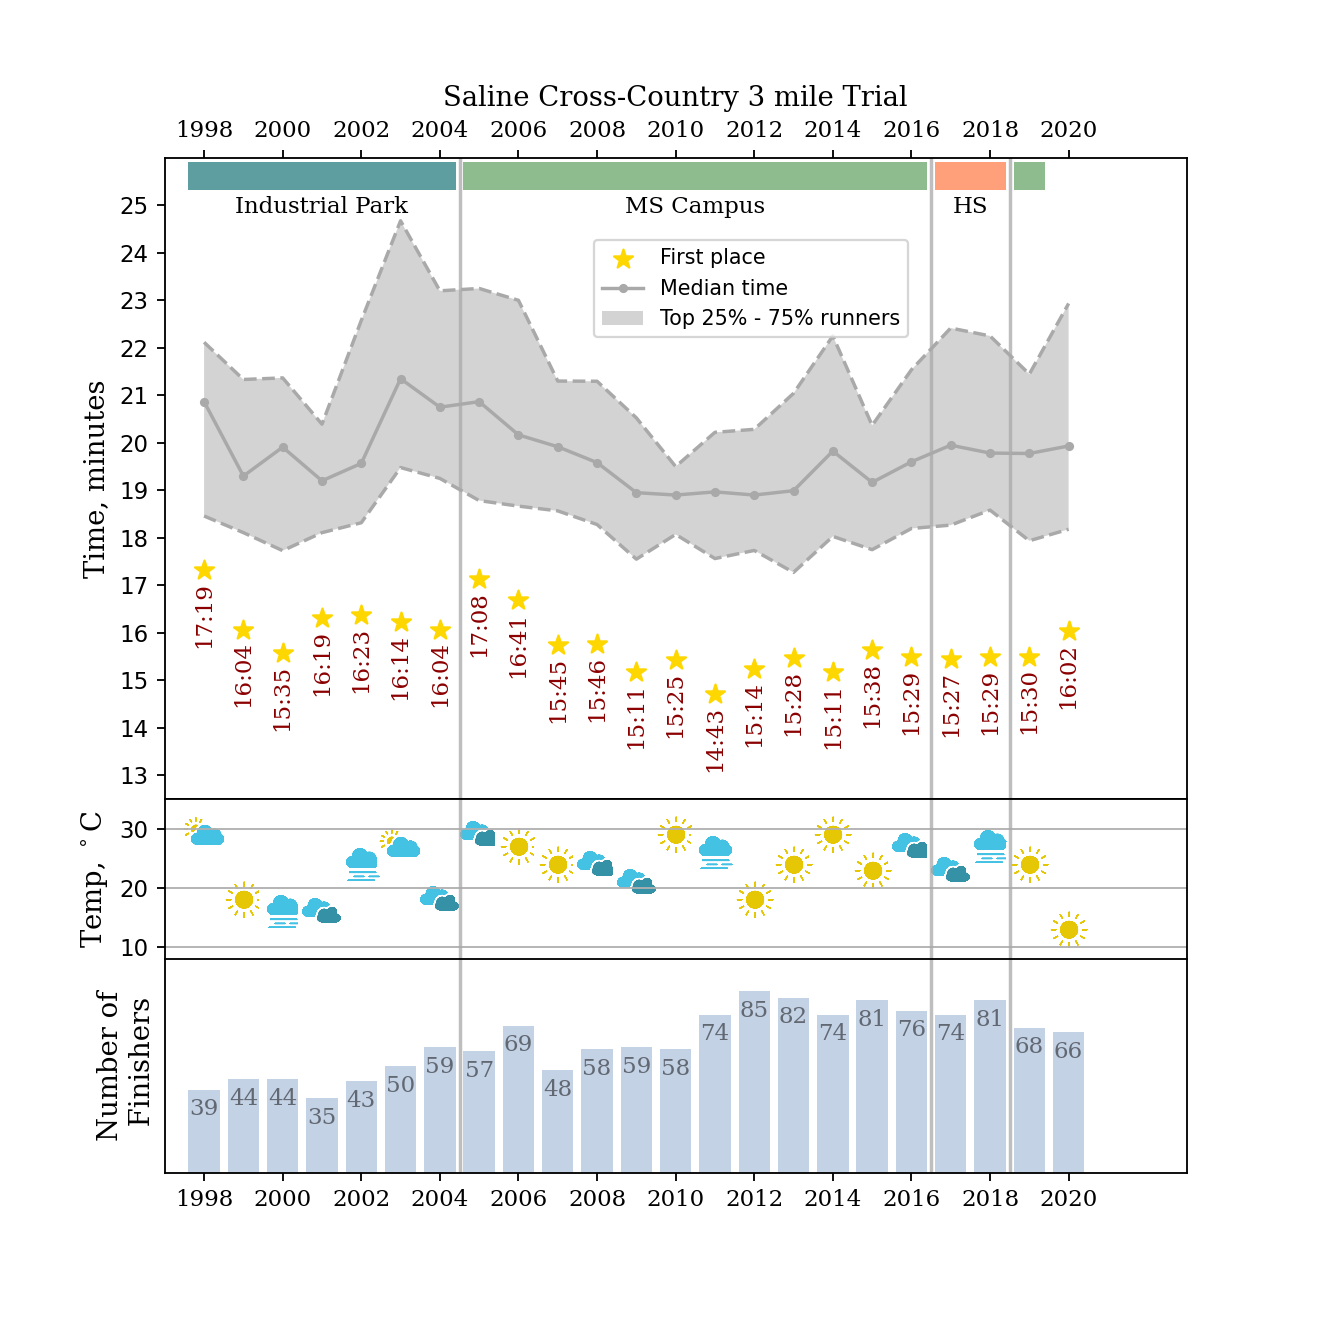

In [61]:

xtick = [yr for yr in years if yr % 2 == 0]
ytick = [t for t in range(780, 1560, 60)]

fig, axs = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3, 0.75, 1]},
                              figsize = (8, 8))
plt.subplots_adjust(hspace=0.)

bests = axs[0].scatter(years, df['Best time in sec'], 
               c='gold', s=75, marker='*');

med = axs[0].plot(years, df['Median time in sec'], '-o', markersize=3, color='darkgrey');
axs[0].plot(years, df['Top 75'], '--', color='darkgrey');
axs[0].plot(years, df['Top 25'], '--', color='darkgrey');
axs[0].fill_between(years, df['Top 75'], df['Top 25'],
                   facecolor='darkgrey', alpha=0.5)

shad = axs[0].fill(np.nan, np.nan, '--', facecolor='darkgrey', alpha=0.5) # trick to legend fill area

axs[0].set_title('Saline Cross-Country 3 mile Trial', fontfamily='serif')
axs[0].set_ylim(750, 1560)
axs[0].set_xlim(1997, 2023)
axs[0].set_xticks(ticks=xtick)
axs[0].set_xticklabels(xtick, fontfamily='serif')
axs[0].set_yticks(ticks=ytick)
axs[0].set_yticklabels([t // 60 for t in ytick])
axs[0].set_ylabel('Time, minutes',
                 fontsize=12, fontfamily='serif')
axs[0].tick_params(top=True, 
                   bottom=False, 
                   left=True, 
                   right=False, 
                   labeltop=True, 
                   labelbottom=False, 
                   labelleft=True )
axs[0].legend([bests, med[0], shad[0]], 
              ['First place', 'Median time', 'Top 25% - 75% runners'], 
              fontsize=9, 
              loc=(0.42, 0.72))

font = {'family': 'serif',
        'weight': 'normal',
        'size': 10}

for yr in years:
    miles = miles_df[yr]
    axs[0].text(yr, df.loc[yr, 'Best time in sec'] - 15, df.loc[yr, 'Best time'],
               ha='center', va='top', fontdict=font, color='darkred', rotation=90)
    
#     axs[0].text(yr, df.loc[yr, 'Best time in sec'] - 15, miles.loc[1, 'Name'],
#            ha='center', va ='top', fontdict=font, color='darkred', rotation=90)

# vertical separating lines

axs[0].text(2001, 1490, 'Industrial Park', fontdict=font, ha='center')
axs[0].text(2010.5, 1490, 'MS Campus', fontdict=font, ha='center')
axs[0].text(2017.5, 1490, 'HS', fontdict=font, ha='center')

color_Ind_Park = '#5F9EA0'
color_MS_Campus = '#8FBC8F'
color_HS_Campus = '#FFA07A'

rect1 = patches.Rectangle((1997.6, 1520), 6.8, 35, linewidth=0.5, 
                          facecolor=color_Ind_Park)
rect2 = patches.Rectangle((2004.6, 1520), 11.8, 35, linewidth=0.5, 
                          facecolor=color_MS_Campus)
rect3 = patches.Rectangle((2016.6, 1520), 1.8, 35, linewidth=0.5, 
                          facecolor=color_HS_Campus)
rect4 = patches.Rectangle((2018.6, 1520), 0.8, 35, linewidth=0.5, 
                          facecolor=color_MS_Campus)
axs[0].add_patch(rect1)
axs[0].add_patch(rect2)
axs[0].add_patch(rect3)
axs[0].add_patch(rect4)

# images as scatter plots
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.07)

psun = 'pics/partly_sunny.png'
sun = 'pics/sunny.png'
overc = 'pics/cloudy.png'
humid = 'pics/humid.png'
misty = 'pics/misty.png'

paths = [psun, sun, misty, overc, misty, psun, overc, overc, 
         sun, sun, overc, overc, sun, misty, sun, sun, sun,
         sun, overc, overc, misty, sun, sun]

for yr, temp, path in zip(years, df.loc[:, 'T, Celsius'], paths):
    if yr == 2014:
        temp = 29 # assume this. they said it was hot
    ab = AnnotationBbox(getImage(path), (yr, temp), frameon=False)
    ab.set(zorder=-1)
    axs[1].add_artist(ab)

axs[1].set_ylim(8, 35)
axs[1].set_xlim(1997, 2023)
axs[1].set_ylabel('Temp, $^\circ$C',
                 fontsize=12, fontfamily='serif')
axs[1].tick_params(bottom=False, labelbottom=False)
axs[1].set_yticks([10, 20, 30])
axs[1].grid(axis='y')

for side in ['bottom']:
    axs[1].spines[side].set_visible(False)

bars = axs[2].bar(years, df['Number of finishers'],
                  color='#B0C4DE', alpha=0.75);
for bar in bars:
    height = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 12, str(int(height)), 
                 ha='center', fontdict=font, color='k', alpha=0.5)    
    
axs[2].tick_params(left=False, labelleft=False)
axs[2].set_ylim(0, 100)
axs[2].set_xlim(1997, 2023)
axs[2].set_xticks(ticks=xtick)
axs[2].set_xticklabels(xtick, fontfamily='serif')
axs[2].set_ylabel('Number of\n Finishers',
                 fontsize=12, fontfamily='serif');
# for side in ['top']:
#     axs[2].spines[side].set_visible(False)

for k in range(3):
    axs[k].plot([2004.5, 2004.5], axs[k].get_ylim(), '-', color='darkgrey', alpha=0.75)
    axs[k].plot([2016.5, 2016.5], axs[k].get_ylim(), '-', color='darkgrey', alpha=0.75)
    axs[k].plot([2018.5, 2018.5], axs[k].get_ylim(), '-', color='darkgrey', alpha=0.75)

In [10]:
fig.savefig('SalineXC.png')

In [51]:
axs[1].get_ylim()

(8.0, 35.0)

In [54]:
list(axs[k].get_ylim()

[0.0, 100.0]